<a href="https://colab.research.google.com/github/superkay13/AMBAR_ML/blob/main/Prueba_3_ORDENES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [14]:
# Paso 1: Cargar los datos
df = pd.read_csv('/content/Base_datos_version5_19_09_2024_ORDENES_1.csv')

In [15]:
df

,Numero,Orden,Familia,Genero,Especie,Nombre completo,Unnamed: 6,100_A.,100_B.,102_B.,...,330_A.,331_A.,332_A.,400_A.,401_B.,403_A.,411_A.,500_A.,501_A.,502_A.
0,1,lamiales,Acanthaceae,Ruellia,inundata,Ruellia inundata,Ruellia inundata,bisexual,bisexual,Superior,...,whorled,two (2),dimerous,whorled,two (2),fused (>5%),three or more (>2),present,discoidal,intraestaminal
1,2,lamiales,Acanthaceae,Ruellia,jussieuoides,Ruellia jussieuoides,Ruellia jussieuoides,bisexual,bisexual,Superior,...,whorled,one (1),dimerous,whorled,two (2),fused (>5%),three or more (>2),present,discoidal,intraestaminal
2,3,lamiales,Acanthaceae,Avicennia,germinans,Avicennia germinans,Avicennia germinans,bisexual,bisexual,Superior,...,whorled,one (1),tetramerous,whorled,one (1),NaN,three or more (>2),present,NaN,NaN
3,4,lamiales,Acanthaceae,Avicennia,germinans,Avicennia germinans,Avicennia germinans,bisexual,bisexual,Superior,...,whorled,one (1),tetramerous,whorled,one (1),NaN,three or more (>2),present,NaN,NaN
4,5,lamiales,Acanthaceae,Avicennia,germinans,Avicennia germinans,Avicennia germinans,bisexual,bisexual,Superior,...,whorled,one (1),tetramerous,whorled,one (1),NaN,three or more (>2),present,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,218,Ericales,Sapotaceae,Sideroxylon,portoricense,Sideroxylon portoricense,Sideroxylon portoricense,bisexual,bisexual,Superior,...,whorled,one (1),pentamerous,whorled,four or five (4-5),fused (>5%),one (1),absent,NaN,NaN
218,219,Malvales,Thymelaeaceae,Daphnopsis,americana,Daphnopsis americana,Daphnopsis americana,bisexual,bisexual,Superior,...,whorled,one (1),dimerous,whorled,one (1),NaN,one (1),absent,NaN,NaN
219,220,Rosales,Ulmaceae,Ulmus,mexicana,Ulmus mexicana,Ulmus mexicana,bisexual,bisexual,superior,...,NaN,NaN,NaN,whorled,two (2),fused (>5%),one (1),NaN,NaN,NaN
220,221,Rosales,Urticaceae,Cecropia,obtusifolia,Cecropia obtusifolia,Cecropia obtusifolia,unisexual,unisexual,superior,...,NaN,NaN,NaN,whorled,one (1),NaN,one (1),absent,NaN,NaN


In [16]:
# prompt: Cuales son las familias con mayor representacion?

family_counts = df['Orden'].value_counts()
print(family_counts)
top_families = family_counts.head(10)  # Mostrar las 10 familias con mayor representación
print("\nLas 10 familias con mayor representación son:")
print(top_families)


Orden
Sapindales        31
Fabales           30
Malpighiales      28
Rosales           20
Malvales          20
Fagales           12
Ericales          10
Brassicales       10
lamiales          10
Arecales           9
Gentianales        9
Myrtales           6
Lamiales           4
Icacinales         4
Boraginales        3
Laurales           3
Caryophyllales     2
Saxifragales       2
Celastrales        2
Apiales            2
Magnoliales        2
Commelinales       1
Oxalidales         1
Proteales          1
Name: count, dtype: int64

Las 10 familias con mayor representación son:
Orden
Sapindales      31
Fabales         30
Malpighiales    28
Rosales         20
Malvales        20
Fagales         12
Ericales        10
Brassicales     10
lamiales        10
Arecales         9
Name: count, dtype: int64


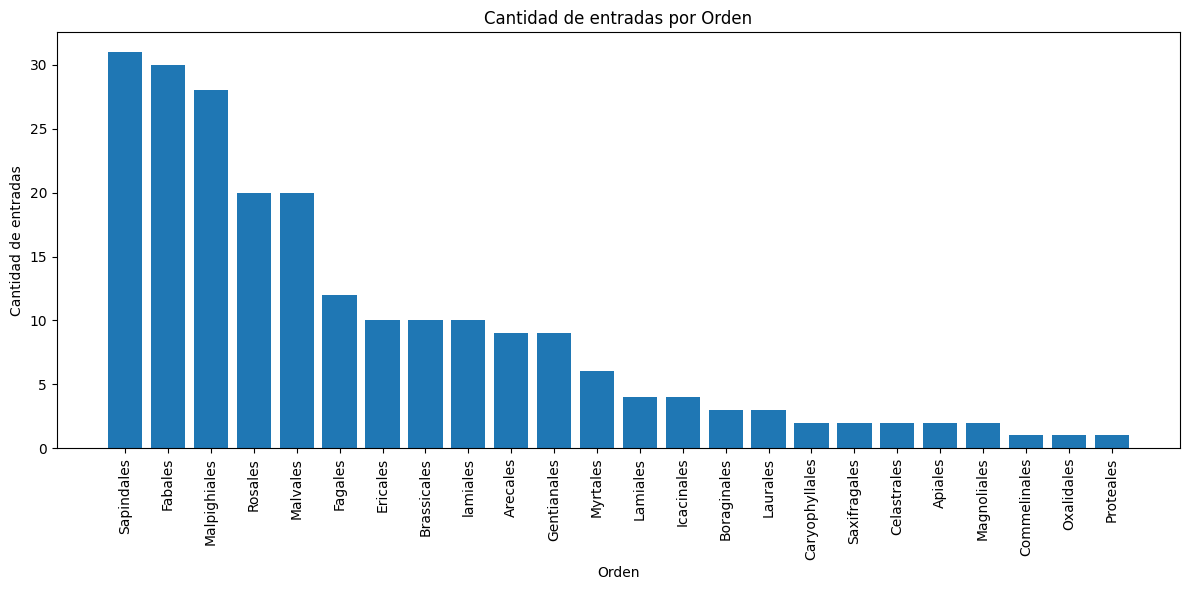

In [17]:
# prompt: Me haces una grafica con todas las familias y su cantidad de entradas?

family_counts = df['Orden'].value_counts()
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura según sea necesario
plt.bar(family_counts.index, family_counts.values)
plt.xlabel('Orden')
plt.ylabel('Cantidad de entradas')
plt.title('Cantidad de entradas por Orden')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()


In [18]:
# prompt: Puedes hacer que todo el contenido de mi df este en minus? Sin cambiar las heads

# Apply lowercase to all values in the DataFrame, excluding headers
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df


<ipython-input-18-aa2a14ce368f>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,Numero,Orden,Familia,Genero,Especie,Nombre completo,Unnamed: 6,100_A.,100_B.,102_B.,...,330_A.,331_A.,332_A.,400_A.,401_B.,403_A.,411_A.,500_A.,501_A.,502_A.
0,1,lamiales,acanthaceae,ruellia,inundata,ruellia inundata,ruellia inundata,bisexual,bisexual,superior,...,whorled,two (2),dimerous,whorled,two (2),fused (>5%),three or more (>2),present,discoidal,intraestaminal
1,2,lamiales,acanthaceae,ruellia,jussieuoides,ruellia jussieuoides,ruellia jussieuoides,bisexual,bisexual,superior,...,whorled,one (1),dimerous,whorled,two (2),fused (>5%),three or more (>2),present,discoidal,intraestaminal
2,3,lamiales,acanthaceae,avicennia,germinans,avicennia germinans,avicennia germinans,bisexual,bisexual,superior,...,whorled,one (1),tetramerous,whorled,one (1),NaN,three or more (>2),present,NaN,NaN
3,4,lamiales,acanthaceae,avicennia,germinans,avicennia germinans,avicennia germinans,bisexual,bisexual,superior,...,whorled,one (1),tetramerous,whorled,one (1),NaN,three or more (>2),present,NaN,NaN
4,5,lamiales,acanthaceae,avicennia,germinans,avicennia germinans,avicennia germinans,bisexual,bisexual,superior,...,whorled,one (1),tetramerous,whorled,one (1),NaN,three or more (>2),present,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,218,ericales,sapotaceae,sideroxylon,portoricense,sideroxylon portoricense,sideroxylon portoricense,bisexual,bisexual,superior,...,whorled,one (1),pentamerous,whorled,four or five (4-5),fused (>5%),one (1),absent,NaN,NaN
218,219,malvales,thymelaeaceae,daphnopsis,americana,daphnopsis americana,daphnopsis americana,bisexual,bisexual,superior,...,whorled,one (1),dimerous,whorled,one (1),NaN,one (1),absent,NaN,NaN
219,220,rosales,ulmaceae,ulmus,mexicana,ulmus mexicana,ulmus mexicana,bisexual,bisexual,superior,...,NaN,NaN,NaN,whorled,two (2),fused (>5%),one (1),NaN,NaN,NaN
220,221,rosales,urticaceae,cecropia,obtusifolia,cecropia obtusifolia,cecropia obtusifolia,unisexual,unisexual,superior,...,NaN,NaN,NaN,whorled,one (1),NaN,one (1),absent,NaN,NaN


In [19]:


# Crear un LabelEncoder
le = LabelEncoder()

# Iterar sobre las columnas categóricas y codificarlas
for col in df.columns:
  df[col] = le.fit_transform(df[col])


In [20]:
df

,Numero,Orden,Familia,Genero,Especie,Nombre completo,Unnamed: 6,100_A.,100_B.,102_B.,...,330_A.,331_A.,332_A.,400_A.,401_B.,403_A.,411_A.,500_A.,501_A.,502_A.
0,0,12,0,98,58,118,118,0,0,1,...,2,2,0,1,4,1,1,1,0,2
1,1,12,0,98,60,119,119,0,0,1,...,2,1,0,1,4,1,1,1,0,2
2,2,12,1,10,44,10,10,0,0,1,...,2,1,2,1,2,2,1,1,2,3
3,3,12,1,10,44,10,10,0,0,1,...,2,1,2,1,2,2,1,1,2,3
4,4,12,1,10,44,10,10,0,0,1,...,2,1,2,1,2,2,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,217,7,52,102,89,125,125,0,0,1,...,2,1,1,1,0,1,0,0,2,3
218,218,16,53,39,9,43,43,0,0,1,...,2,1,0,1,2,2,0,0,2,3
219,219,20,54,114,69,138,138,0,0,1,...,3,3,4,1,4,1,0,2,2,3
220,220,20,55,22,77,22,22,1,1,1,...,3,3,4,1,2,2,0,0,2,3


In [21]:
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()
categorias = df.columns[7:]
x=df[categorias]
y=df[["Orden"]]

In [22]:
# prompt: Dime cuantas categorias tengo en mi dataframe x

num_categories = x.nunique()
print(num_categories)


100_A.     2
100_B.     2
102_B.     3
201_A.     2
201_B.     4
204_A.     4
207_A.     3
230_A.     3
231_A.     4
232_A.     5
234_A.     3
tepalos    7
caliz      9
corola     8
301_B.     4
305_A.     3
311_A.     4
312_A.     3
313_A.     4
330_A.     4
331_A.     4
332_A.     5
400_A.     3
401_B.     6
403_A.     3
411_A.     4
500_A.     3
501_A.     3
502_A.     4
dtype: int64


In [33]:
# prompt: Me puedes imprimir las categorias de mi data frame

print(df.columns)


Index(['Numero', 'Orden', 'Familia', 'Genero', 'Especie', 'Nombre completo',
       'Unnamed: 6', '100_A.', '100_B.', '102_B.', '201_A.', '201_B.',
       '204_A.', '207_A.', '230_A.', '231_A.', '232_A.', '234_A.', 'tepalos',
       'caliz', 'corola', '301_B.', '305_A.', '311_A.', '312_A.', '313_A.',
       '330_A.', '331_A.', '332_A.', '400_A.', '401_B.', '403_A.', '411_A.',
       '500_A.', '501_A.', '502_A.'],
      dtype='object')


In [23]:
y

,Orden
0,12
1,12
2,12
3,12
4,12
...,...
217,7
218,16
219,20
220,20


In [25]:
# prompt: Dime cuantas familias diferentes tengo

num_familias = y['Orden'].nunique()
print(f"Hay {num_familias} ordenes diferentes.")


Hay 23 ordenes diferentes.


In [26]:
# prompt: Cuales son las 4 familias con mayor reprecentacion?

familia_counts = y['Orden'].value_counts()
top_4_familias = familia_counts.head(4)
print("Las 4 Ordenes con mayor representación son:")
print(top_4_familias)


Las 4 Ordenes con mayor representación son:
Orden
21    31
8     30
15    28
20    20
Name: count, dtype: int64


<Axes: title={'center': 'Familia'}, ylabel='Frequency'>

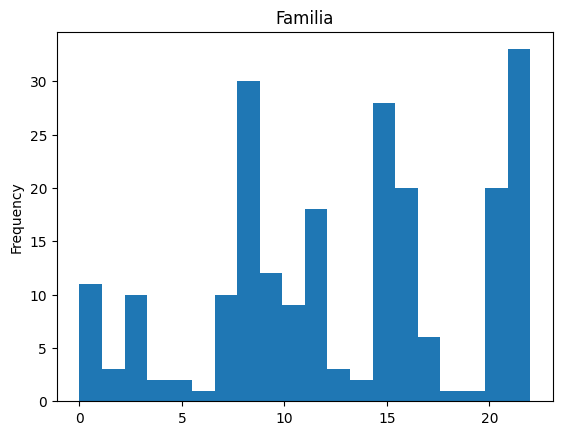

In [27]:
# @title Familia

from matplotlib import pyplot as plt
y['Orden'].plot(kind='hist', bins=20, title='Familia')
#plt.gca().spines[['top', 'right',]].set_visible(False)

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [29]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy en el conjunto de prueba: 0.6081081081081081
Recall en el conjunto de prueba: 0.6081081081081081
F1-score en el conjunto de prueba: 0.575027225027225


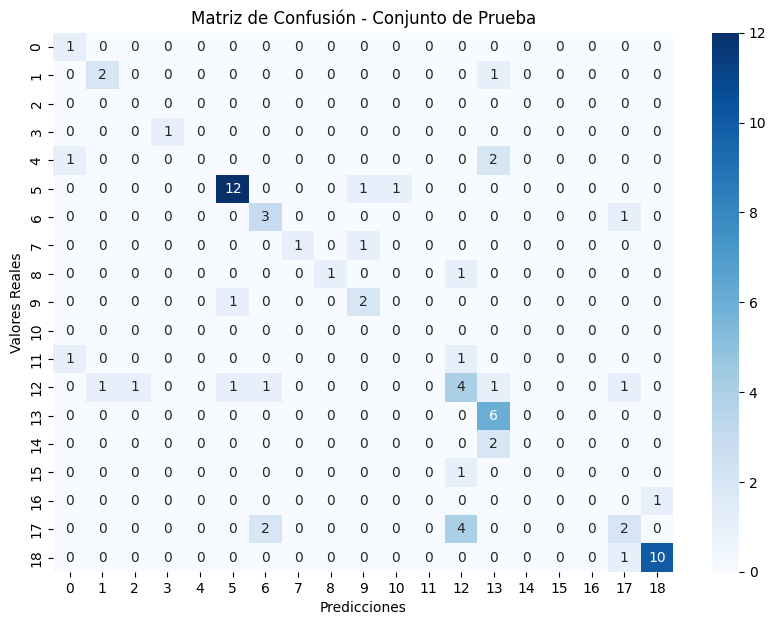

Accuracy en el conjunto de entrenamiento: 1.0
Recall en el conjunto de entrenamiento: 1.0
F1-score en el conjunto de entrenamiento: 1.0


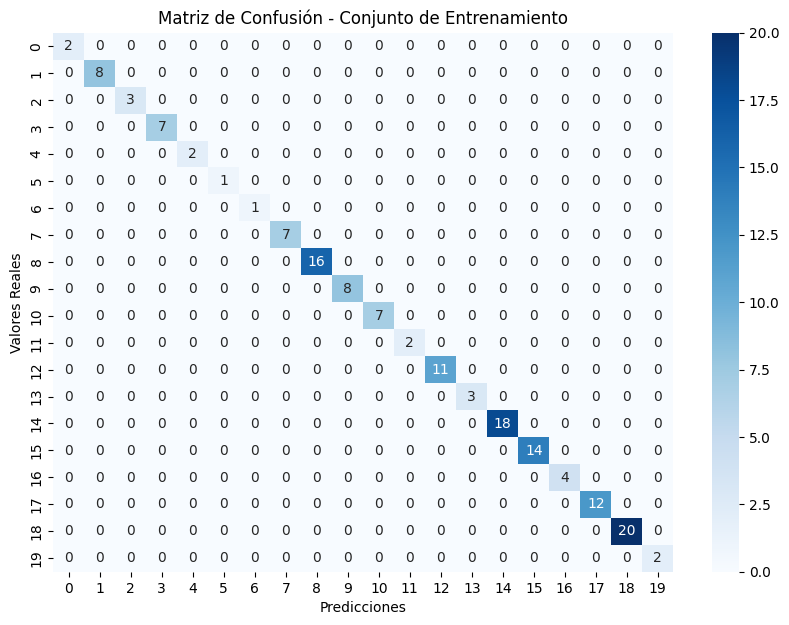

In [30]:


# Predicciones en el conjunto de prueba
y_pred_test = forest.predict(x_test)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Predicciones en el conjunto de entrenamiento
y_pred_train = forest.predict(x_train)

# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Recall en el conjunto de entrenamiento: {recall_train}")
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()


Escalar los datos


In [31]:
#Llamamos a nuestro objeto para escalar
scaler = StandardScaler()  #Asignamos la operación a un objeto
x_scaled = scaler.fit_transform(x) #Ajustamos y transformamos nuestros datos


In [35]:
x_scaled = pd.DataFrame(x_scaled, columns=[ '100_A.', '100_B.', '102_B.', '201_A.', '201_B.',
       '204_A.', '207_A.', '230_A.', '231_A.', '232_A.', '234_A.', 'tepalos',
       'caliz', 'corola', '301_B.', '305_A.', '311_A.', '312_A.', '313_A.',
       '330_A.', '331_A.', '332_A.', '400_A.', '401_B.', '403_A.', '411_A.',
       '500_A.', '501_A.', '502_A.'])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.33, random_state=42)

In [37]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy en el conjunto de prueba: 0.6216216216216216
Recall en el conjunto de prueba: 0.6216216216216216
F1-score en el conjunto de prueba: 0.5849722349722349


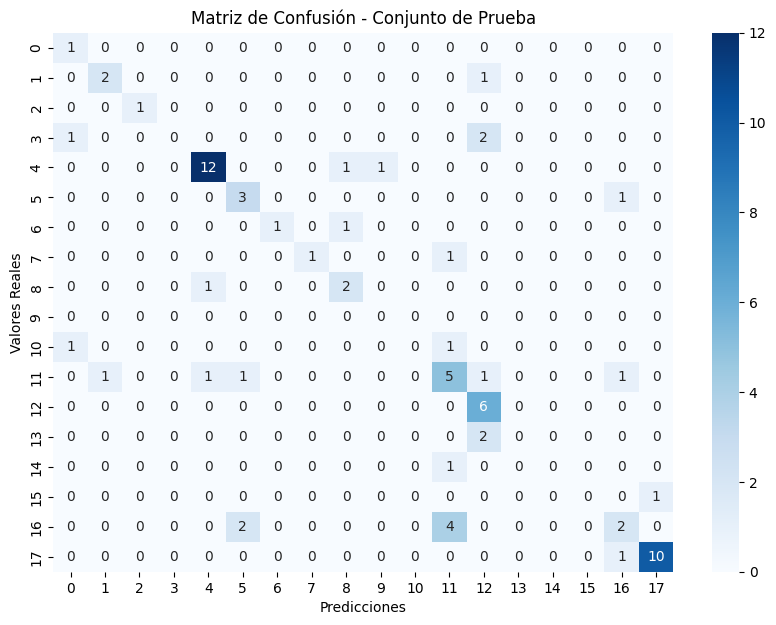

Accuracy en el conjunto de entrenamiento: 1.0
Recall en el conjunto de entrenamiento: 1.0
F1-score en el conjunto de entrenamiento: 1.0


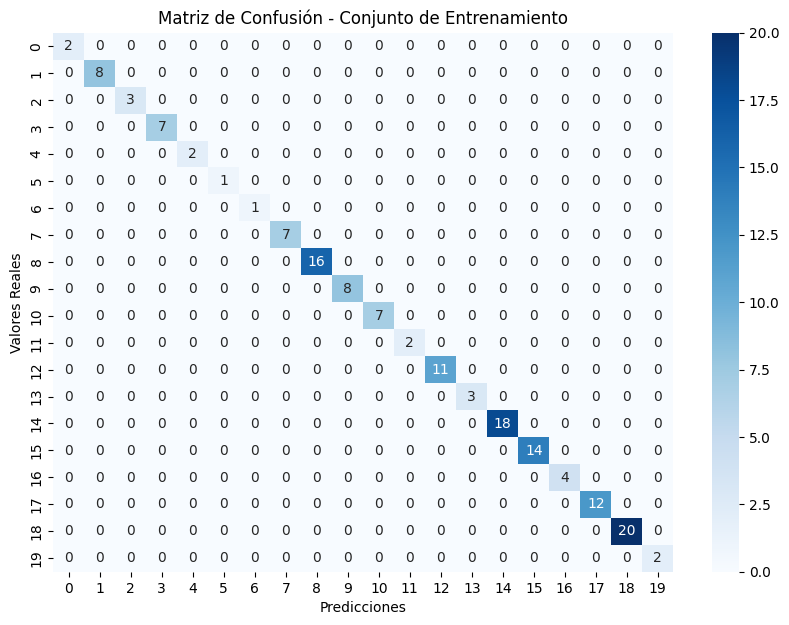

In [38]:

# Predicciones en el conjunto de prueba
y_pred_test = forest.predict(x_test)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Predicciones en el conjunto de entrenamiento
y_pred_train = forest.predict(x_train)

# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Recall en el conjunto de entrenamiento: {recall_train}")
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

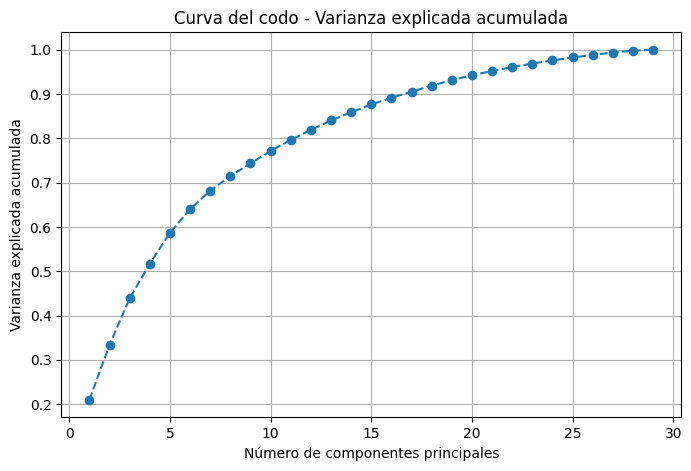

In [39]:
# Importar las bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Inicializar el modelo PCA
pca = PCA()

# Ajustar PCA a los datos escalados
pca.fit(x_scaled)

# Calcular la varianza explicada acumulada
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Graficar la curva del codo
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Curva del codo - Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

In [40]:
#Creamos nuestro objeto llamando a la función

pca_2 = PCA(n_components=2) #Al momento de llamar nuestro objeto, le vamos a especificar cuantos componentes deseamos

#Ajustamos nuestro objeto de PCA
pca_2.fit(x_scaled)

PCA(n_components=2)

In [41]:
#Creamos nuestro objeto llamando a la función

pca = PCA(n_components=15) #Al momento de llamar nuestro objeto, le vamos a especificar cuantos componentes deseamos

#Ajustamos nuestro objeto de PCA
pca.fit(x_scaled)

PCA(n_components=15)

In [42]:
#Ahora vamos a transformar nuestros datos a la dimensión del PCA
x_pca_2 = pca_2.transform(x_scaled)
x_pca_2

#Ahora vamos a transformar nuestros datos a la dimensión del PCA
x_pca = pca.transform(x_scaled)
x_pca

array([[-1.51617276,  1.79583378,  1.09610963, ..., -0.45154691,
        -1.46179862, -0.91920484],
       [-2.16635395,  1.88264446,  1.10236749, ...,  0.01568405,
        -0.9498277 , -0.67831601],
       [-1.39183815,  2.18048727,  0.99891824, ...,  0.12594949,
        -0.62853699, -0.19674754],
       ...,
       [ 0.54213558, -2.08916393,  0.67013494, ...,  0.73002576,
        -1.25122285, -0.13888578],
       [ 2.67252404, -3.39623752, -0.50394647, ...,  0.29092851,
        -0.90532579, -0.17316979],
       [ 7.57447475,  5.27750803,  1.51909246, ...,  0.90872159,
        -0.52139604, -0.26781986]])

In [46]:
df_pca = pd.DataFrame(x_pca_2)
df_pca.columns = ["PC1", "PC2"]

#Y agregar las etiquetas
df_pca["Y"] = df["Orden"]

In [47]:
print(df_pca)

          PC1       PC2   Y
0   -1.516173  1.795834  12
1   -2.166354  1.882644  12
2   -1.391838  2.180487  12
3   -1.504949  2.122709  12
4   -1.618059  2.064931  12
..        ...       ...  ..
217 -1.590596  0.050257   7
218 -0.928337  2.435790  16
219  0.542136 -2.089164  20
220  2.672524 -3.396238  20
221  7.574475  5.277508  20

[222 rows x 3 columns]


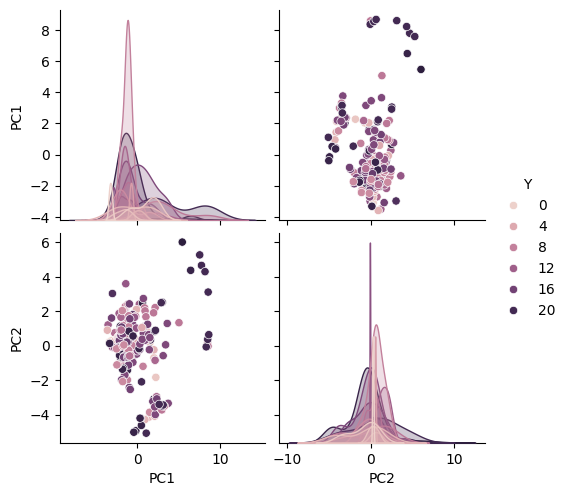

In [48]:
# Y lo podemos gráficar
sns.pairplot(df_pca, hue = "Y")
plt.show()

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.33, random_state=42)

In [50]:
forest=RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy en el conjunto de prueba: 0.5945945945945946
Recall en el conjunto de prueba: 0.5945945945945946
F1-score en el conjunto de prueba: 0.5575537075537075


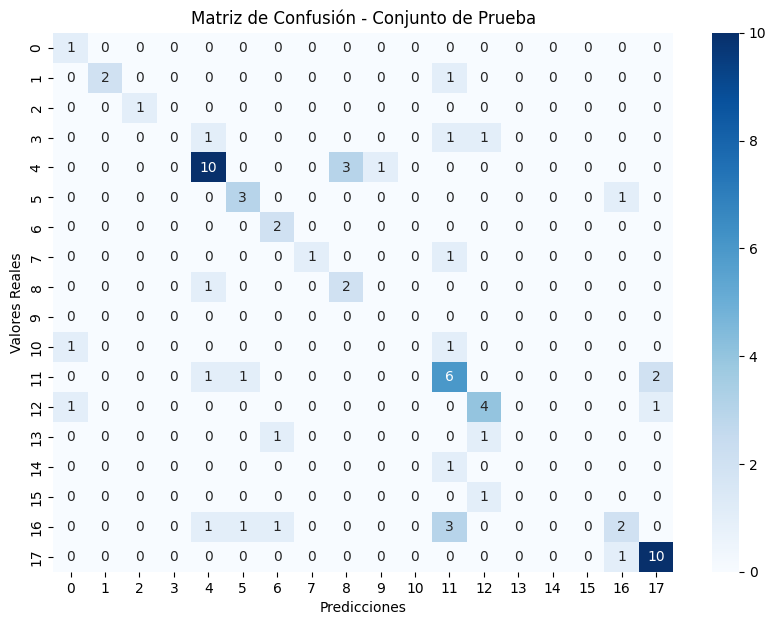

Accuracy en el conjunto de entrenamiento: 1.0
Recall en el conjunto de entrenamiento: 1.0
F1-score en el conjunto de entrenamiento: 1.0


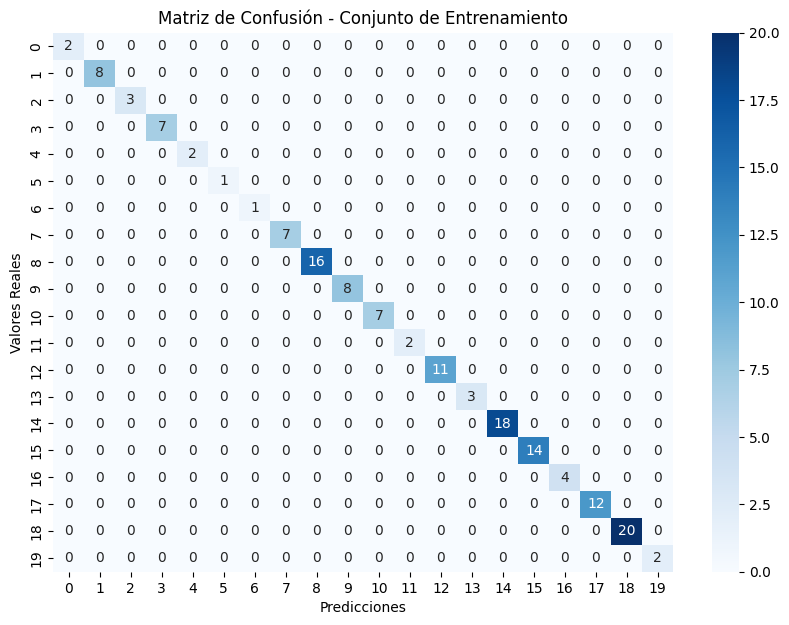

In [51]:

# Predicciones en el conjunto de prueba
y_pred_test = forest.predict(x_test)

# Calcular métricas para el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print(f"Accuracy en el conjunto de prueba: {accuracy_test}")
print(f"Recall en el conjunto de prueba: {recall_test}")
print(f"F1-score en el conjunto de prueba: {f1_test}")

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Prueba")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

# Predicciones en el conjunto de entrenamiento
y_pred_train = forest.predict(x_train)

# Calcular métricas para el conjunto de entrenamiento
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')

print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train}")
print(f"Recall en el conjunto de entrenamiento: {recall_train}")
print(f"F1-score en el conjunto de entrenamiento: {f1_train}")

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Conjunto de Entrenamiento")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()